## Skoltech
## Intro to data science, fall 2021
## Assigment 2

### Goals
- Make exploratory data analysis
- Apply feature engineering and feature selection
- Try to solve classification tasks and use classification performance metrics


# Submiting the answers

Google form to submit your answers: https://docs.google.com/forms/d/e/1FAIpQLSfAQzhQGmdCYLtaeeaAn2mgNut5HO4U6l3G1KUbBO0qDtA7FA/viewform

Use your **skoltech email**. For Name, Surname use **exactly the same spelling** as in canvas system.

---

If your answer is a ``float number``, then you must round it up to **3 decimals after the floating point**, e.g. 3.142 for pi or 9.78 for 9.780023

---

If your answer is a ``list of float or integer numbers``, then they should be reported in descending order, divided by a comma, e.g.:

10.453,9.112,5.001,5.000,1.02

If your answer is a ``list of str or letters``, then they should be in alphabetical order , e.g.:

charlie,foxtrot,kilo,uniform

a,c,f

---

The last part (Q5) does not have corresponding fields in the google form. It is **not optional** and it will be graded manually from your .ipynb file.

---

If you have any questions regarding this Home Assignment, you can ask them on piazza:https://piazza.com/class/ku068l4dg0068n

## Dataset
Customer Personality Analysis is a detailed analysis of a company’s ideal customers. It helps a business to better understand its customers and makes it easier for them to modify products according to the specific needs, behaviors and concerns of different types of customers.

#### Attributes

**People**

-   ID: Customer's unique identifier
-   Year_Birth: Customer's birth year
-   Education: Customer's education level
-   Marital_Status: Customer's marital status
-   Kidhome: Number of children in customer's household
-   Teenhome: Number of teenagers in customer's household
-   Dt_Customer: Date of customer's enrollment with the company
-   Recency: Number of days since customer's last purchase
-   Complain: 1 if customer complained in the last 2 years, 0 otherwise


**Products**

-   MntWines: Amount spent on wine in last 2 years
-   MntFruits: Amount spent on fruits in last 2 years
-   MntMeatProducts: Amount spent on meat in last 2 years
-   MntFishProducts: Amount spent on fish in last 2 years
-   MntSweetProducts: Amount spent on sweets in last 2 years
-   MntGoldProds: Amount spent on gold in last 2 years

**Promotion**

-   NumDealsPurchases: Number of purchases made with a discount
-   AcceptedCmp: 1 if customer accepted the offer in the last campaign, 0 otherwise

**Behavior**

-   NumWebPurchases: Number of purchases made through the company’s web site
-   NumCatalogPurchases: Number of purchases made using a catalogue
-   NumStorePurchases: Number of purchases made directly in stores
-   NumWebVisitsMonth: Number of visits to company’s web site in the last month
-   NumDealsPurchases: Number of purchases made with a discount


#### Import basic libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

#### Read the data

In [2]:
df = pd.read_csv('marketing_campaign.csv', sep='\t', index_col='ID')

## 1. Data exploration

Let's take a closer look at the data.

In [3]:
df.head()

,Year_Birth,Education,Marital_Status,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,...,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Z_CostContact,Z_Revenue,AcceptedCmp
ID,,,,,,,,,,,,,,,,,,,,,
5524,1963,Graduation,Single,0,0,2018-04-09,58,635,88,546,...,88,3,8,10,4,7,0,3,11,1
2174,1960,Graduation,Single,1,1,2020-08-03,38,11,1,6,...,6,2,1,1,2,5,0,3,11,0
4141,1971,Graduation,Together,0,0,2019-08-21,26,426,49,127,...,42,1,8,2,10,4,0,3,11,0
6182,1990,Graduation,Together,1,0,2020-10-02,26,11,4,20,...,5,2,2,0,4,6,0,3,11,0
5324,1987,PhD,Married,1,0,2020-01-19,94,173,43,118,...,15,5,5,3,6,5,0,3,11,0


### Q1.1

#### How many columns in the dataset?

In [4]:
len(df.columns)

22

### Q1.2

#### How many unique marital statuses are there?

In [5]:
df['Marital_Status'].nunique()

8

### Q1.3
#### What is the average age, if we assume now it is 2021? E.g. if we would have two people born in 2001 and 1999, the average age would be 21. Please answer with an integer.

In [6]:
yrs = 2021 - df['Year_Birth']
yrs.mean()

46.19419642857143

### Q1.4
#### There are some columns related to spendings by category, they are starting with 'Mnt': MntWines, MntFruits, etc. In which category people spent the most on average?

In [7]:
avrs = []
for name in df.columns:
    if 'Mnt' in name:
        avrs.append([name, df[name].mean()])
    
avrs # we can see it's Wines
        

[['MntWines', 303.9357142857143],
 ['MntFruits', 26.302232142857143],
 ['MntMeatProducts', 166.95],
 ['MntFishProducts', 37.52544642857143],
 ['MntSweetProducts', 27.06294642857143],
 ['MntGoldProds', 44.021875]]

### Q1.5

There are columns describing how customers make their orders, these columns start with num, e.g. 'NumDealsPurchases',
 or 'NumWebPurchases'. Build a histogram for the number of web visits (NumWebVisitsMonth). What is the 'most popular' number of visits, i.e. what number of visits encounters most often in the column?

(array([153., 202., 205., 218., 281., 340., 393., 342.,  86.]),
 array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 9 Patch objects>)

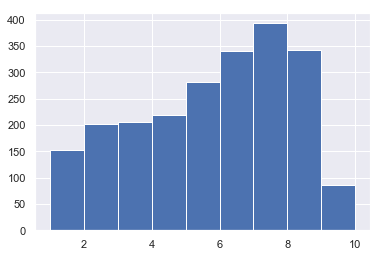

In [8]:
plt.hist(df.NumWebVisitsMonth, bins=[i for i in range(1, 11)])

In [9]:
df.NumWebVisitsMonth.mode()

0    7
dtype: int64

### Q1.6 

Let's try to analyze different features together. Build a [pairplot](https://seaborn.pydata.org/generated/seaborn.pairplot.html) for all the 'Num..' columns with 'AcceptedCmp' as a 'hue' argument. The hue argument adds a color marker to the plots and it will allow us to analyze how customers with different behavior patterns react to the marketing proposals. Note, to use the column as hue, it should be passed with the rest of the columns; also you can pass `kind='scatter', plot_kws=dict(alpha=0.2)` arguments to make the dots semi-transparent.

Which of the statements are true, if judged from the plot?
- (a) The people, who don't visit web site don't buy with a discount
- (b) All the people who often visit the website buy a lot online
- (c) People, who buy with a discount, much more often accept marketing campaign
- (d) There is not any clear dependency between web visits and the number of catalog purchases

In [10]:
num_col = []

for name in df.columns:
    if 'Num' in name:
        num_col.append(name)
        
num_col 

['NumDealsPurchases',
 'NumWebPurchases',
 'NumCatalogPurchases',
 'NumStorePurchases',
 'NumWebVisitsMonth']

In [11]:
data_num = df[num_col]

Here I've some memory leak issues

In [12]:
# sns.pairplot(df, x_vars=data_num, y_vars=data_num, hue='AcceptedCmp', kind='scatter', plot_kws=dict(alpha=0.2))

TypeError: Cannot interpret '<attribute 'dtype' of 'numpy.generic' objects>' as a data type

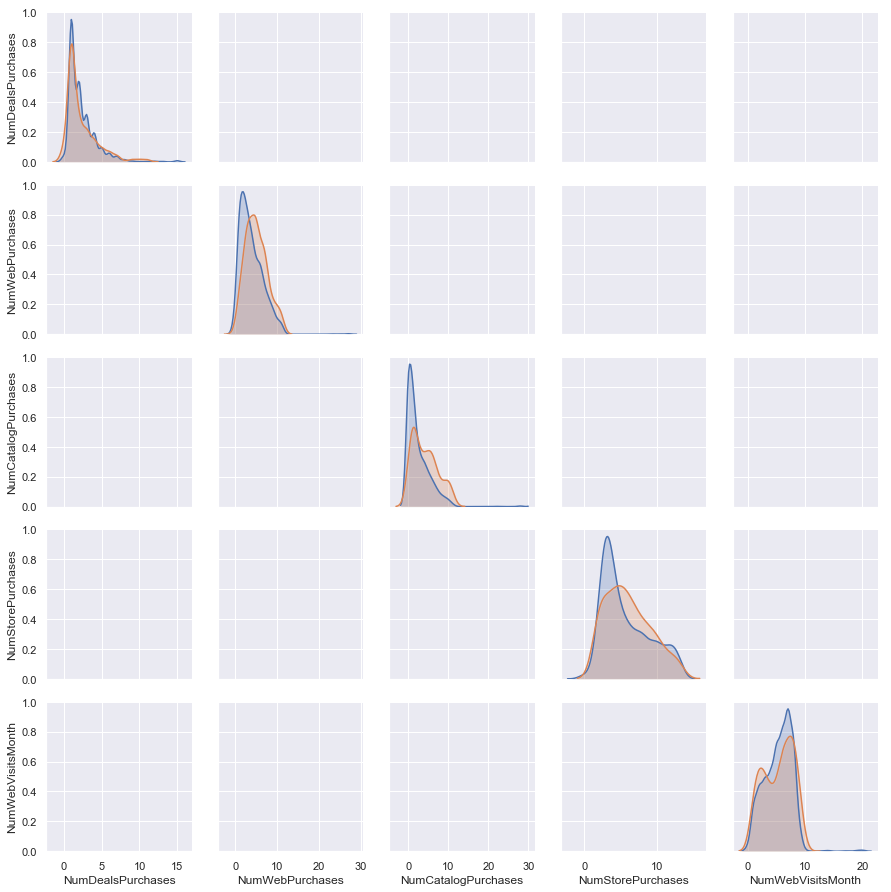

In [31]:
cols = [col for col in df if col.startswith('Num')]

sns.pairplot(df, x_vars = cols, y_vars = cols, hue = 'AcceptedCmp', kind='scatter', plot_kws=dict(alpha=0.2))

### Q1.7

Build a [crosstab](https://pandas.pydata.org/docs/reference/api/pandas.crosstab.html) for teen at home ('Teenhome') and kids at home ('Kidhome'). How many customers have 2 kids and a single teenager?

In [13]:
pd.crosstab(df.Teenhome, df.Kidhome)

Kidhome,0,1,2
Teenhome,,,
0,638,503,17
1,625,374,31
2,30,22,0


### Q1.8
There is a 'Dt_Customer' column with a customer registration date. In which month there were a maximum number of registrations? Answer with the name, i.e. 'January'. Hint: you probably want to convert the column to datetime from string.

In [14]:
df.Dt_Customer = pd.to_datetime(df.Dt_Customer)

In [15]:
df['Mon_Cust'] = df.Dt_Customer.dt.month

In [16]:
df.groupby('Mon_Cust')['Mon_Cust'].count().idxmax()

8

In [17]:
df.drop('Mon_Cust', axis=1, inplace=True)

## 2. Preprocessing
The goal of the segment is to prepare data for further work

### Q2.1
There are two columns, that has the same value for all the people and they don't have a description in the sections above. Let's drop them. As an answer, write the names of these columns divided by a comma.

In [18]:
df.nunique() # so it is Z_CostContact and Z_Revenue (have only one value)

Year_Birth              59
Education                5
Marital_Status           8
Kidhome                  3
Teenhome                 3
Dt_Customer            663
Recency                100
MntWines               776
MntFruits              158
MntMeatProducts        558
MntFishProducts        182
MntSweetProducts       177
MntGoldProds           213
NumDealsPurchases       15
NumWebPurchases         15
NumCatalogPurchases     14
NumStorePurchases       14
NumWebVisitsMonth       16
Complain                 2
Z_CostContact            1
Z_Revenue                1
AcceptedCmp              2
dtype: int64

In [19]:
df.drop(['Z_CostContact', 'Z_Revenue'], axis=1, inplace=True)

### Q2.2
As we could see before, there are some strange rare marital statuses. We going to leave only three options - 'Married', 'Together' and 'Single'. All other options should be changed to 'Single'. How many people are now in this category?

In [20]:
allowed_st = ['Married', 'Together', 'Single']

for i in df.index:
    if df.loc[i, 'Marital_Status'] not in allowed_st:
        df.loc[i, 'Marital_Status'] = 'Single'

In [21]:
df[df.Marital_Status == 'Single'].count()

Year_Birth             796
Education              796
Marital_Status         796
Kidhome                796
Teenhome               796
Dt_Customer            796
Recency                796
MntWines               796
MntFruits              796
MntMeatProducts        796
MntFishProducts        796
MntSweetProducts       796
MntGoldProds           796
NumDealsPurchases      796
NumWebPurchases        796
NumCatalogPurchases    796
NumStorePurchases      796
NumWebVisitsMonth      796
Complain               796
AcceptedCmp            796
dtype: int64

In [22]:
df['Marital_Status'].unique()

array(['Single', 'Together', 'Married'], dtype=object)

### Q2.3

Now it's time to talk about the task for today. Our big retail company "Y6" want to launch a marketing campaign, but we want to make the marketing proposal only to people, who would accept it with the high probability. So we need to build a model that would predict it.

Let's divide the dataset into a target (the 'AcceptedCmp' column) and data (the rest of the columns). How many positive labels are there in target?


In [23]:
len(df[df.AcceptedCmp > 0])

334

In [24]:
target = df.AcceptedCmp
data = df.drop('AcceptedCmp', axis=1)

### Q2.4

To honestly estimate the performance of the model, we need to split the dataset into train and test parts. In reality, a test could be millions of customers and a train could be a small playground to estimate the campaign. Our current dataset is not that big, so let's say the test would be just 30% of the dataset. Use `train_test_split` to make a split. Please set the `random_state` argument to 42 and don't forget to shuffle and stratify.
How many positive labels do you have in test targets?

In [25]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data, target, test_size=0.3, random_state=42, shuffle=True, stratify=target)

/Users/polina/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1609: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return floored.astype(np.int)
/Users/polina/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1609: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to rev

In [26]:
len(y_test[y_test > 0])

100

## 3. Basic models

Let's start with the most basic models. We going to use logistic regression, and classifier, and random forest without any modification or param tuning. This way we could be sure our future modification would indeed make the model stronger.

Some of the features are not usable in the current form, e.g. `Dt_Customer` as a date or `Education` as categorical, so let's make a copy of x with the following columns for the section:

'Year_Birth', 'Kidhome',
'Teenhome',  'Recency', 'MntWines', 'MntFruits',
'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'Complain'

In [27]:
data_numcol = df[['Year_Birth', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'Complain']]

In [28]:
x_train, x_test, y_train, y_test = train_test_split(data_numcol, target, test_size=0.3, random_state=42, shuffle=True, stratify=target)

/Users/polina/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1609: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return floored.astype(np.int)
/Users/polina/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1609: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to rev

### Q3.1

Build a logistic regression model. Set max_iter parameter to 5000. What is the f1_score for the model?


In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

/Users/polina/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/least_angle.py:35: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  eps=np.finfo(np.float).eps,
/Users/polina/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/least_angle.py:597: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  eps=np.finfo(np.float).eps, copy_X=

In [32]:
logreg = LogisticRegression(max_iter=5000)
logreg.fit(x_train, y_train)
y_pred = logreg.predict(x_test)

/Users/polina/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/polina/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/base.py:283: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  indices = (scores > 0).astype(np.int)


In [33]:
from sklearn.metrics import f1_score
f1_score(y_test, y_pred)

0.27067669172932335

### Q3.2

Build a k-neighbors classifier. What is the f1_score for the model?

In [34]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier()
classifier.fit(x_train, y_train);

/Users/polina/anaconda3/lib/python3.7/site-packages/sklearn/neighbors/base.py:907: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  self._y = np.empty(y.shape, dtype=np.int)


In [35]:
y_pred = classifier.predict(x_test)
f1_score(y_test, y_pred)

0.2647058823529412

### Q3.3

Build a random forest classifier. What is the f1_score for the model?

In [36]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

/Users/polina/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/gradient_boosting.py:34: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  from ._gradient_boosting import predict_stages
/Users/polina/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/gradient_boosting.py:34: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  from ._gradient_boostin

In [37]:
f1_score(y_test, y_pred)

0.35714285714285715

### Q3.4

The models without fine-tuning are not as effective. First, let's try to regularize the regression with the L2 norm. Use 5-split cross-validation grid search to find the optimal C. What is the f1 score for the model trained on the full train dataset with this regularization?

In [38]:
from sklearn.linear_model import LogisticRegression

In [39]:
parameters = {'C':np.linspace(0.01,10,500)}
reg = LogisticRegression(penalty='l2', solver='liblinear')
reg_gs = GridSearchCV(reg, parameters, cv=5, n_jobs=-1, scoring='f1')
reg_gs.fit(x_train, y_train)
print(reg_gs.best_params_)
reg_gs.best_score_

/Users/polina/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:665: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  test_folds = np.zeros(n_samples, dtype=np.int)
/Users/polina/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:437: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If 

{'C': 0.8708617234468938}


/Users/polina/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:821: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int)


0.3260936100282226

In [40]:
pred = reg_gs.best_estimator_.predict(x_test)
f1_score(y_test, pred)

/Users/polina/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/base.py:283: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  indices = (scores > 0).astype(np.int)


0.26865671641791045

### Q3.5

Fine-tune a k-NN classifier, try to find an optimal number of neighbors, weights, and p with a 5-split cross-validation. What is the f1 score for a model trained on a full train dataset with these parameters?

In [41]:
parameters = {'n_neighbors':np.arange(1,30,1), 'weights': ['uniform', 'distance'], 'p': np.arange(1, 5, 1)}
neighbors = KNeighborsClassifier()
neighbors_gs = GridSearchCV(neighbors, parameters, cv=5, n_jobs=-1, scoring='f1')
neighbors_gs.fit(x_train, y_train)`
print(neighbors_gs.best_params_)
neighbors_gs.best_score_

/Users/polina/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:665: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  test_folds = np.zeros(n_samples, dtype=np.int)
/Users/polina/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:437: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If 

{'n_neighbors': 1, 'p': 1, 'weights': 'uniform'}


/Users/polina/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:821: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int)
/Users/polina/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/Users/polina/anaconda3/lib/python3.7/site-packages/sklearn/neighbors/base.py:907: Deprec

0.3371721350007336

In [42]:
pred = neighbors_gs.best_estimator_.predict(x_test)
f1_score(y_test, pred)

0.3615819209039548

### Q3.6

Use the 5-split CV to find the optimal number of estimators and max_features for the random forest. What is the f1 score for random forest trained on a full train dataset with these parameters?

In [71]:
parameters = {'max_features':[1,16,3], 'n_estimators':[100,1000,250]}
rfc = RandomForestClassifier()
rfc_gs = GridSearchCV(rfc, parameters, cv=5, n_jobs=-1, scoring='f1')
rfc_gs.fit(x_train, y_train)
print(rfc_gs.best_params_)
rfc_gs.best_score_

/Users/polina/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:665: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  test_folds = np.zeros(n_samples, dtype=np.int)
/Users/polina/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:437: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If 

{'max_features': 16, 'n_estimators': 1000}


/Users/polina/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:149: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_encoded = np.zeros(y.shape, dtype=np.int)
/Users/polina/anaconda3/lib/python3.7/site-packages/sklearn/tree/tree.py:149: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your curre

0.3910415996381466

In [72]:
pred = rfc_gs.best_estimator_.predict(x_test)
f1_score(y_test, pred)

/Users/polina/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/base.py:158: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int)


0.4

## 4. Working with features

Machine learning is sometimes called data science because everything depends on data. In this section, we'll apply some of the most popular modifications for data. IMPORTANT: In the previous section we took a subset of the columns; now it's time to work with all of them.

### Q4.1

One of the standard procedures is data standardizations - it strongly influences the results of k-NN and make the convergence of other algorithms (i.e. logreg and neural nets) much faster. Let's apply `StandardScaler` for all the numerical columns - 'Recency', 'Year_Birth', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth'. 

What is the maximum value of MntWines now in the test set?

In [47]:
num_col = ['Recency', 'Year_Birth', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']

In [48]:
x_train, x_test, y_train, y_test = train_test_split(data, target, test_size=0.3, random_state=42, shuffle=True, stratify=target)

/Users/polina/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1609: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return floored.astype(np.int)
/Users/polina/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1609: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to rev

In [49]:
from sklearn.preprocessing import StandardScaler

In [50]:
scaler = StandardScaler()
scaler.fit(x_train[num_col])

x_train[num_col] = scaler.transform(x_train[num_col])
x_test[num_col] = scaler.transform(x_test[num_col])

/Users/polina/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/polina/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.
/Users/polina/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/Users/polina/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try

In [51]:
x_test['MntWines'].max()

3.4452353571219576

### Q4.2
We have two categorical columns - education and marital status. We can't use them directly with our models, so let's use one-hot encoding - create a separate binary column for each possible value and drop the original 'Education' and 'Marital_Status' columns.

How many columns do we have now?

In [52]:
data = df.drop('AcceptedCmp', axis=1)
data.head()

,Year_Birth,Education,Marital_Status,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain
ID,,,,,,,,,,,,,,,,,,,
5524,1963,Graduation,Single,0,0,2018-04-09,58,635,88,546,172,88,88,3,8,10,4,7,0
2174,1960,Graduation,Single,1,1,2020-08-03,38,11,1,6,2,1,6,2,1,1,2,5,0
4141,1971,Graduation,Together,0,0,2019-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0
6182,1990,Graduation,Together,1,0,2020-10-02,26,11,4,20,10,3,5,2,2,0,4,6,0
5324,1987,PhD,Married,1,0,2020-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0


In [53]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse=False)
encoded_features = pd.DataFrame(ohe.fit_transform(data[['Education','Marital_Status']]))

edu_cols = [f'edu_{cat}' for cat in ohe.categories_[0]]
marstat_cols = [f'marstat_{cat}' for cat in ohe.categories_[1]]

dummy_cols_names = [*edu_cols, *marstat_cols]
encoded_features.columns = dummy_cols_names

encoded_features.index = data.index

data.drop(['Education', 'Marital_Status'], axis=1, inplace=True)

data = pd.concat([data, encoded_features], axis=1)

/Users/polina/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:351: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  X = check_array(X, dtype=np.int)
/Users/polina/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:95: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to r

In [54]:
num_cols = list(set(x_train.columns) - set(['Education','Marital_Status']))

In [55]:
x_train = pd.merge(x_train[num_cols], encoded_features, left_index=True, right_index=True)

In [56]:
num_cols

['Dt_Customer',
 'NumCatalogPurchases',
 'MntSweetProducts',
 'Teenhome',
 'Recency',
 'Kidhome',
 'MntFishProducts',
 'MntFruits',
 'NumWebPurchases',
 'NumDealsPurchases',
 'Year_Birth',
 'MntGoldProds',
 'MntMeatProducts',
 'NumWebVisitsMonth',
 'NumStorePurchases',
 'Complain',
 'MntWines']

In [57]:
x_test = pd.merge(x_test[num_cols], encoded_features, left_index=True, right_index=True)

In [58]:
len(data.columns)

25

### Q4.3 
We have a datetime column - customer registration date `Dt_Customer`. We can't use it directly, but we could use some derivative features. Let's create new columns 'recent_customer' with value `1` if a user was registered after `01/06/2020` and `0` otherways. The original `Dt_Customer` column should be dropped. How many recent customers do we have in the train set?

Hints: you can use `pd.to_datetime` for the column and `datetime.datetime` to create a new date.

In [59]:
data.dtypes

Year_Birth                      int64
Kidhome                         int64
Teenhome                        int64
Dt_Customer            datetime64[ns]
Recency                         int64
MntWines                        int64
MntFruits                       int64
MntMeatProducts                 int64
MntFishProducts                 int64
MntSweetProducts                int64
MntGoldProds                    int64
NumDealsPurchases               int64
NumWebPurchases                 int64
NumCatalogPurchases             int64
NumStorePurchases               int64
NumWebVisitsMonth               int64
Complain                        int64
edu_2n Cycle                  float64
edu_Basic                     float64
edu_Graduation                float64
edu_Master                    float64
edu_PhD                       float64
marstat_Married               float64
marstat_Single                float64
marstat_Together              float64
dtype: object

In [60]:
mask = data['Dt_Customer'] > pd.datetime(2020, 6, 1) 
for i in df.index:
    data.loc[i, 'recent_customer'] = int(mask[i])

In [61]:
data[data.recent_customer > 0].count()

Year_Birth             181
Kidhome                181
Teenhome               181
Dt_Customer            181
Recency                181
MntWines               181
MntFruits              181
MntMeatProducts        181
MntFishProducts        181
MntSweetProducts       181
MntGoldProds           181
NumDealsPurchases      181
NumWebPurchases        181
NumCatalogPurchases    181
NumStorePurchases      181
NumWebVisitsMonth      181
Complain               181
edu_2n Cycle           181
edu_Basic              181
edu_Graduation         181
edu_Master             181
edu_PhD                181
marstat_Married        181
marstat_Single         181
marstat_Together       181
recent_customer        181
dtype: int64

In [62]:
data.drop(['Dt_Customer'], axis=1, inplace=True)

In [63]:
x_train.drop(['Dt_Customer'], axis=1, inplace=True)
x_test.drop(['Dt_Customer'], axis=1, inplace=True)

### Q4.4

To check the effects of the modification, train the logistic regression with an optimal C. What is the f1 score now?

In [64]:
clf = LogisticRegression(solver='liblinear', penalty='l2', **reg_gs.best_params_)
clf.fit(x_train, y_train)
pred = clf.predict(x_test)
f1_score(y_test, pred)

/Users/polina/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/base.py:283: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  indices = (scores > 0).astype(np.int)


0.34285714285714286

### Q4.5

Another popular metric for unbalanced classification tasks is the ROC curve. Train a k-NN and random forest with optimal params and build a roc-curve for both of them on the sample plot. What is the difference between them on FPR 0.7 (approximately)?

/Users/polina/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:665: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  test_folds = np.zeros(n_samples, dtype=np.int)
/Users/polina/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:437: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If 

Text(0.5, 1.0, 'ROC curve: ROC AUC=0.61')

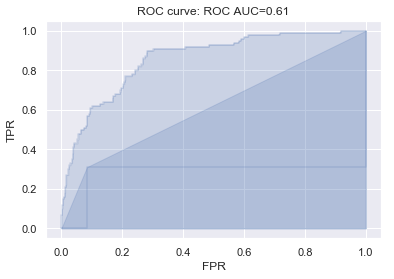

In [100]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

neighbors_gs.fit(x_train, y_train)
y_proba = neighbors_gs.predict_proba(x_test)
y_proba = y_proba[:, 1]

fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.step(fpr, tpr, color='b', alpha=0.2,
         where='post')
plt.fill_between(fpr, tpr, alpha=0.2, color='b')

rfc_gs.fit(x_train, y_train)
y_proba1 = rfc_gs.predict_proba(x_test)
y_proba1 = y_proba1[:, 1]

fpr1, tpr1, _1 = roc_curve(y_test, y_proba1)
plt.step(fpr1, tpr1, color='b', alpha=0.2,
         where='post')
plt.fill_between(fpr1, tpr1, alpha=0.2, color='b')

plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve: ROC AUC={0:0.2f}'.format(
          roc_auc_score(y_test, y_proba)))

Plot is at the end of message above, difference is 0.15 (didn't put in Google Form)

In [101]:
roc_auc_score(y_test, y_proba1) # RF

0.8591433566433567

In [102]:
roc_auc_score(y_test, y_proba) # kNN

0.613041958041958

### Q5.1 (2 points)

Propose two derivative features and retrain one of the models with them. What is the performance? (lets say f1 sc)

### Q5.2

Train an xboost model with f1 score 0.47+

In [88]:
import sys
!{sys.executable} -m pip install xgboost

In [89]:
from xgboost import XGBClassifier

In [93]:
model = XGBClassifier(objective ='reg:logistic', learning_rate = 0.71,
alpha = 1, n_estimators = 100, scale_pos_weight=10)
model.fit(x_train, y_train)


/Users/polina/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier(alpha=1, base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
       gamma=0, gpu_id=-1, importance_type=None,
       interaction_constraints='', learning_rate=0.71, max_delta_step=0,
       max_depth=6, min_child_weight=1, missing=nan,
       monotone_constraints='()', n_estimators=100, n_jobs=4,
       num_parallel_tree=1, objective='reg:logistic', predictor='auto',
       random_state=0, reg_alpha=1, reg_lambda=1, scale_pos_weight=10,
       subsample=1, tree_method='exact', use_label_encoder=True,
       validate_parameters=1, verbosity=None)

In [94]:
pred = model.predict(x_test)
f1_score(y_test, pred)

0.4973544973544973

0.47+ as required